# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D

seed=0
np.random.seed(seed) # fix random seed for reproducibility
tf.set_random_seed(seed)

### Excercise 12.1

The goal of excercise 12.1 is to use a deep neural network model (*DNN*) to recognize and distinguish between the handwritten digits of the MNIST dataset.

By keeping fixed all the other parameters, I trained my NN using `SGD`, `Adam` and `RMSprop` optimizers watching to accuracy and loss for training and validation data.

#### Step 1: Load and Process the Data

In [21]:
from keras.datasets import mnist

# Input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# Output
num_classes = 10 # 10 digits

# The data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# Cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# Convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


#### Step 2: Define the Neural Net and its Architecture

In [22]:
# Define the NN architecture
def create_DNN():
    # Instantiate model
    model = Sequential()
    # Add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # Add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # Apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # Soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


#### Step 3: Choose the Optimizer and the Cost Function

In [23]:
def compile_model(optim):
    # Create the model
    model = create_DNN()
    # Compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optim,
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


#### Step 4: Train the model +  Step 5: Evaluate the Model Performance on the *Unseen* Test Data

Optimizer:  sgd
Test-loss: 0.1597717761632055
Test-accuracy: 0.9521


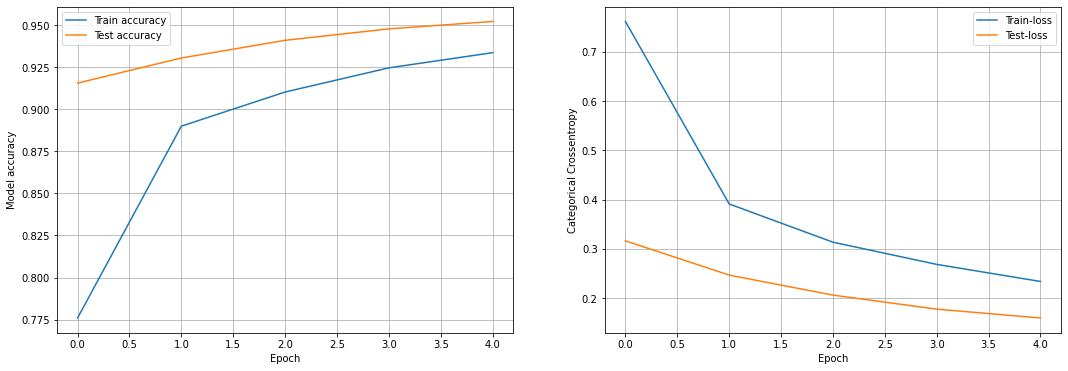

Optimizer:  Adam
Test-loss: 0.08261387781432714
Test-accuracy: 0.9776


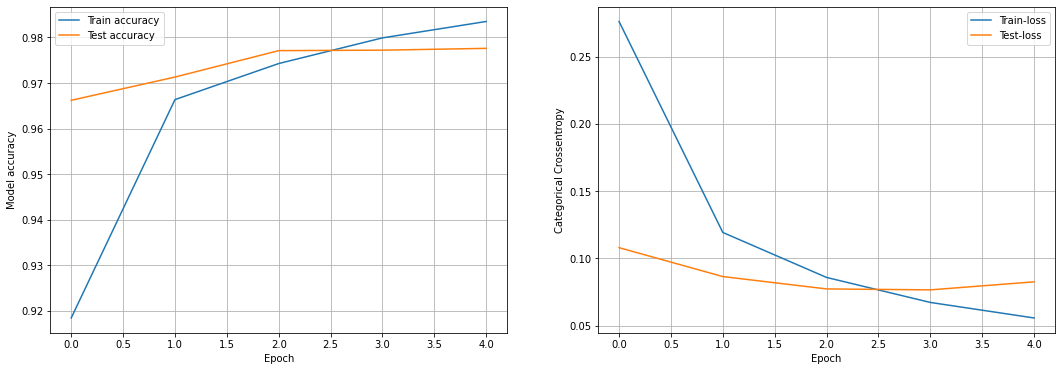

Optimizer:  RMSprop
Test-loss: 0.15885584157360136
Test-accuracy: 0.9755


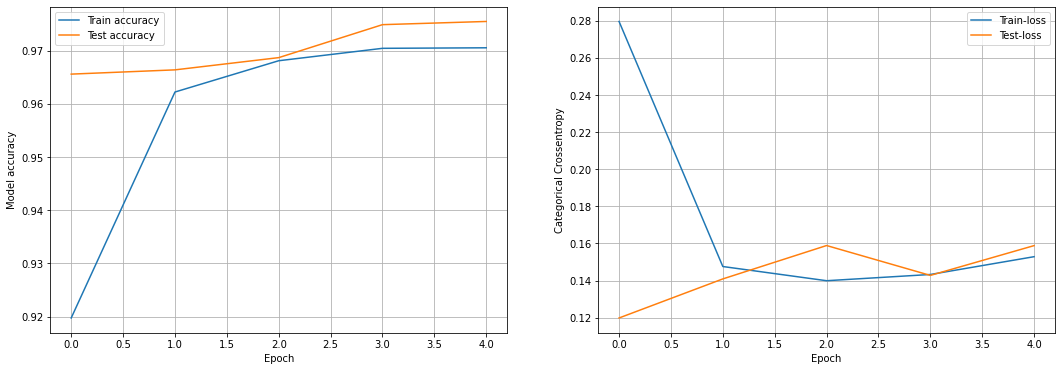

In [24]:
# Training parameters
batch_size = 32
epochs = 5

optims = ["sgd", "Adam", "RMSprop"]

index = 1

for optim in optims:
    
    # Create the deep neural net
    model_DNN = compile_model(optim)

    # Train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))
    
    # Evaluate model
    score = model_DNN.evaluate(X_test, Y_test, verbose=0)

    # Print performance
    print('Optimizer: ', optim)
    print('Test-loss:', score[0])
    print('Test-accuracy:', score[1])
    
    # Plot train and validation acccuracy and loss 
    plt.figure(index, figsize = (18, 6))
    # summarize history for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('Model accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train accuracy', 'Test accuracy'], loc='best')
    plt.grid(True)
    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Categorical Crossentropy')
    plt.xlabel('Epoch')
    plt.legend(['Train-loss', 'Test-loss'], loc='best')
    plt.grid(True)
    
    plt.show()
    
    index = index + 1

The network that exploits `Adam` optimizer is the one that obtains best results, even if in the second part of the training the test accuracy tends to stationate. This is clearly visible in the loss plot, in which we see the train curve keeping decrease and the test curve settle, sign that probably increasing training time we would incur in overfitting.

`Sgd` curve are the most regular and probably increasing training time would lead to better results.

The graph of `RMSprop` shows a moment when test accuracy starts to decrease then increase again. 
This is evident in loss plot, in which test loss reaches a maximum and then starts to descend again.
Also in this case we would likely improve the result increasing training time.

In all three cases we are able to reach accuracy values higher than $95\%$.

### Exercise 12.2

I than changed the architecture of my DNN using convolutional layers to consider also local spatial correlations between the pixels, hoping to improve the accuracy of the classification of the model.

I used `Conv2D`, `MaxPooling2D`, `Dropout`, and also `Flatten`, `Dense` and `soft-max` layers to build such convolutional DNN.

In [25]:
# Reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [26]:
def create_CNN():
    # Instantiate model
    model = Sequential()
    
    # Add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    # Add MaxPooling layer                           
    model.add(MaxPooling2D(pool_size=2))
    # Add convolutional layer with 5 filters
    model.add(Conv2D(5, kernel_size=(5, 5), activation='relu'))
    # Add MaxPooling layer                              
    model.add(MaxPooling2D(pool_size=2))
    # Add Flatten layer
    model.add(Flatten())
    # Add FC layer (relu)
    model.add(Dense(120, activation='relu'))
    # Add FC layer (softmax)
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer = 'SGD',
                  metrics = ['accuracy'])
    
    return model

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 70s 1ms/step - loss: 0.6112 - acc: 0.8132 - val_loss: 0.1865 - val_acc: 0.9426
Epoch 2/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1654 - acc: 0.9497 - val_loss: 0.1154 - val_acc: 0.9637
Epoch 3/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1211 - acc: 0.9620 - val_loss: 0.0941 - val_acc: 0.9717
Epoch 4/5
60000/60000 [==============================] - 55s 917us/step - loss: 0.0992 - acc: 0.9694 - val_loss: 0.0892 - val_acc: 0.9699
Epoch 5/5
10000/10000 [==============================] - 4s 402us/step

Test-loss: 0.0761430143608246
Test-accuracy: 0.9763


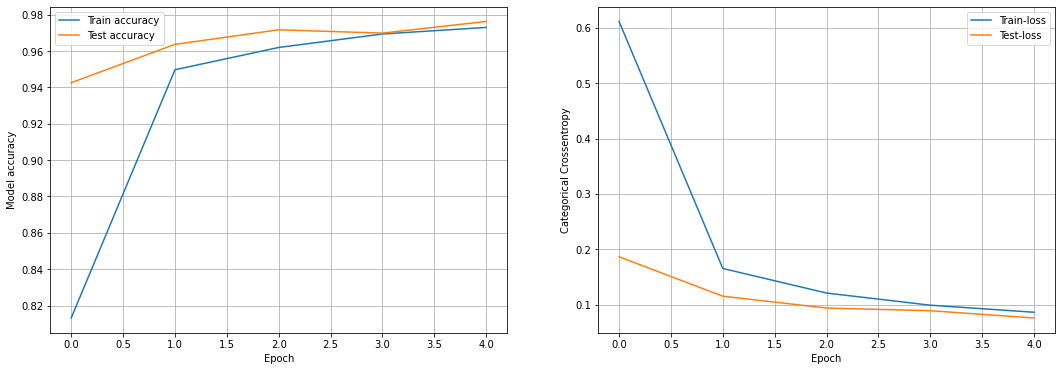

In [27]:
# Training parameters
batch_size = 32
epochs = 5

# Create the deep conv net
model_CNN=create_CNN()

# Train CNN
history = model_CNN.fit(X_train, Y_train, batch_size = batch_size,
                        epochs = epochs, verbose = 1, 
                        validation_data = (X_test, Y_test))

# Evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# Print performance
print()
print('Test-loss:', score[0])
print('Test-accuracy:', score[1])

# Plot train and validation accuracy and loss vs epochs
plt.figure(index, figsize = (18, 6))
# Summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='best')
plt.grid(True)
# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Train-loss', 'Test-loss'], loc='best')
plt.grid(True)

plt.show()

As we can see the model is able to reach a better accuracy with `sgd` changing the network architecture into a DCNN rather than using a standard DNN.

### Exercise 12.3

Finally I used the `gimp` application to create 10 pictures of digits "handwritten" by me and imported them with the provided code in order to see if my DCNN is able to recognize them.

Errors:  1


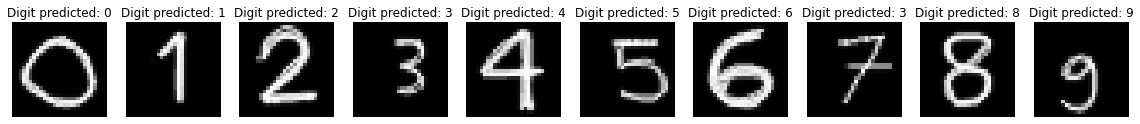

In [29]:
from PIL import Image
import os

errors = 0

plt.figure(figsize=(10*2,2))

for digit in range(10):
    digit_filename = "digits/"+str(digit)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    plt.subplot(1, 10, digit+1)
    
    plt.imshow(data, cmap='gray')
    
    data = data.reshape(1,xdim*ydim)

    if keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        
    pred_0 = model_CNN.predict(data)
    
    if np.argmax(pred_0) != digit:
        errors = errors + 1
       
    plt.title("Digit predicted: {}".format(np.argmax(pred_0)))
    plt.axis('off')
    
print("Errors: ", errors)

As we can see my DCNN is able to predict correctly 9 out of 10 digits written by me, a success!